# Perlin Noise

Perlin Noise 算法介绍

### 定义 Vector2

`Vector2` 表示坐标系里的一个点。
实现坐标点乘。

In [1]:
data class Vector2(val x: Double, val y: Double) {
    operator fun times(other: Vector2): Double {
        return this.x * other.x + this.y * other.y;
    }
}

// 测试
Vector2(1.0, 2.0) * Vector2(2.0, 1.0)

4.0

In [2]:
USE {
    repositories {
        maven("https://s01.oss.sonatype.org/content/repositories/releases/")
        mavenCentral()
    }

    dependencies {
        implementation("dev.yidafu.jupyter:jupyter-js:0.7.0")
        implementation("org.jetbrains.kotlinx:kandy-lets-plot:0.7.0")
    }
}

# 先实现生成 500 * 500 的灰度图



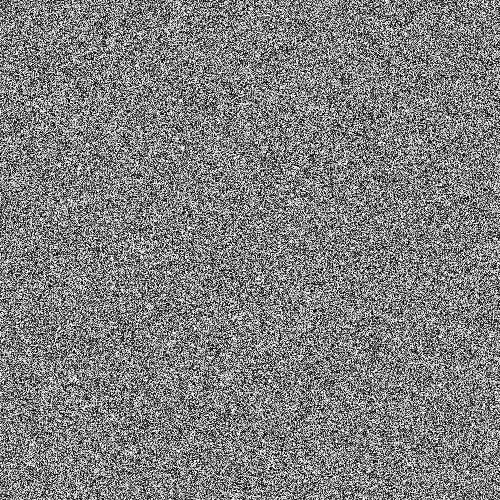

In [3]:
import java.awt.Color
import java.awt.image.BufferedImage
import java.io.ByteArrayOutputStream
import kotlin.random.Random
import java.io.IOException
import java.net.URL


val width: Int = 500;
val height: Int = 500;

val image = BufferedImage(width, height, BufferedImage.TYPE_INT_ARGB)

for (y in 0 until height) {
    for (x in 0 until width) {
        // 生成一个 0 到 255 之间的随机灰度值
        val grayValue = Random.nextInt(0, 256)
        // 设置像素的颜色
        image.setRGB(x, y, Color(grayValue, grayValue, grayValue).rgb)
    }
}

image

### 生成 `permutation table`

<https://cs.nyu.edu/~perlin/noise/> 

示例：
```js
[
   151,160,137,91,90,15,
   131,13,201,95,96,53,194,233,7,225,140,36,103,30,69,142,8,99,37,240,21,10,23,
   190, 6,148,247,120,234,75,0,26,197,62,94,252,219,203,117,35,11,32,57,177,33,
   88,237,149,56,87,174,20,125,136,171,168, 68,175,74,165,71,134,139,48,27,166,
   77,146,158,231,83,111,229,122,60,211,133,230,220,105,92,41,55,46,245,40,244,
   102,143,54, 65,25,63,161, 1,216,80,73,209,76,132,187,208, 89,18,169,200,196,
   135,130,116,188,159,86,164,100,109,198,173,186, 3,64,52,217,226,250,124,123,
   5,202,38,147,118,126,255,82,85,212,207,206,59,227,47,16,58,17,182,189,28,42,
   223,183,170,213,119,248,152, 2,44,154,163, 70,221,153,101,155,167, 43,172,9,
   129,22,39,253, 19,98,108,110,79,113,224,232,178,185, 112,104,218,246,97,228,
   251,34,242,193,238,210,144,12,191,179,162,241, 81,51,145,235,249,14,239,107,
   49,192,214, 31,181,199,106,157,184, 84,204,176,115,121,50,45,127, 4,150,254,
   138,236,205,93,222,114,67,29,24,72,243,141,128,195,78,66,215,61,156,180
]
```

In [4]:
// 为了方便观察，写死 permutation table
fun createPermutationTable(): List<Int> {
    val list = listOf(
     151,160,137,91,90,15,
   131,13,201,95,96,53,194,233,7,225,140,36,103,30,69,142,8,99,37,240,21,10,23,
   190, 6,148,247,120,234,75,0,26,197,62,94,252,219,203,117,35,11,32,57,177,33,
   88,237,149,56,87,174,20,125,136,171,168, 68,175,74,165,71,134,139,48,27,166,
   77,146,158,231,83,111,229,122,60,211,133,230,220,105,92,41,55,46,245,40,244,
   102,143,54, 65,25,63,161, 1,216,80,73,209,76,132,187,208, 89,18,169,200,196,
   135,130,116,188,159,86,164,100,109,198,173,186, 3,64,52,217,226,250,124,123,
   5,202,38,147,118,126,255,82,85,212,207,206,59,227,47,16,58,17,182,189,28,42,
   223,183,170,213,119,248,152, 2,44,154,163, 70,221,153,101,155,167, 43,172,9,
   129,22,39,253, 19,98,108,110,79,113,224,232,178,185, 112,104,218,246,97,228,
   251,34,242,193,238,210,144,12,191,179,162,241, 81,51,145,235,249,14,239,107,
   49,192,214, 31,181,199,106,157,184, 84,204,176,115,121,50,45,127, 4,150,254,
   138,236,205,93,222,114,67,29,24,72,243,141,128,195,78,66,215,61,156,180
    )
    return list + list
//     val list = MutableList<Int>(256) { it }
//     val list2 =  list.shuffled()
//     return (list2 + list2)
}

val P = createPermutationTable()

### 展示 permutation table

In [5]:


import org.jetbrains.kotlinx.kandy.util.color.Color as KColor

val permutationData:  Map<String, List<Int>>  = mapOf(
    "index" to     (1..512).toList(),
    "permutation" to P,
);

plot(permutationData) {
    x("index")
    y("permutation")


    points {
        color = KColor.RED
        symbol = Symbol.CIRCLE
        size = 2.5
    }

    line {
        color = KColor.BLUE
    }
}

<head>
 <meta charset="UTF-8">
 <style> html, body { margin: 0; overflow: hidden; } </style>
 <script type="text/javascript" data-lets-plot-script="library" src="https://cdn.jsdelivr.net/gh/JetBrains/lets-plot@v4.3.3/js-package/distr/lets-plot.min.js"></script>
 </head>
 <body>
 <div id="Iz5Y94"></div>
 <script type="text/javascript" data-lets-plot-script="plot">
 var plotSpec={
"mapping":{
},
"data":{
"index":[1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0,20.0,21.0,22.0,23.0,24.0,25.0,26.0,27.0,28.0,29.0,30.0,31.0,32.0,33.0,34.0,35.0,36.0,37.0,38.0,39.0,40.0,41.0,42.0,43.0,44.0,45.0,46.0,47.0,48.0,49.0,50.0,51.0,52.0,53.0,54.0,55.0,56.0,57.0,58.0,59.0,60.0,61.0,62.0,63.0,64.0,65.0,66.0,67.0,68.0,69.0,70.0,71.0,72.0,73.0,74.0,75.0,76.0,77.0,78.0,79.0,80.0,81.0,82.0,83.0,84.0,85.0,86.0,87.0,88.0,89.0,90.0,91.0,92.0,93.0,94.0,95.0,96.0,97.0,98.0,99.0,100.0,101.0,102.0,103.0,104.0,105.0,106.0,107.0,108.0,109.0,110.0,111.0,112.0,113.0,114.0,115.0,116.0,117.0,118.0,119.0,120.0,121.0,122.0,123.0,124.0,125.0,126.0,127.0,128.0,129.0,130.0,131.0,132.0,133.0,134.0,135.0,136.0,137.0,138.0,139.0,140.0,141.0,142.0,143.0,144.0,145.0,146.0,147.0,148.0,149.0,150.0,151.0,152.0,153.0,154.0,155.0,156.0,157.0,158.0,159.0,160.0,161.0,162.0,163.0,164.0,165.0,166.0,167.0,168.0,169.0,170.0,171.0,172.0,173.0,174.0,175.0,176.0,177.0,178.0,179.0,180.0,181.0,182.0,183.0,184.0,185.0,186.0,187.0,188.0,189.0,190.0,191.0,192.0,193.0,194.0,195.0,196.0,197.0,198.0,199.0,200.0,201.0,202.0,203.0,204.0,205.0,206.0,207.0,208.0,209.0,210.0,211.0,212.0,213.0,214.0,215.0,216.0,217.0,218.0,219.0,220.0,221.0,222.0,223.0,224.0,225.0,226.0,227.0,228.0,229.0,230.0,231.0,232.0,233.0,234.0,235.0,236.0,237.0,238.0,239.0,240.0,241.0,242.0,243.0,244.0,245.0,246.0,247.0,248.0,249.0,250.0,251.0,252.0,253.0,254.0,255.0,256.0,257.0,258.0,259.0,260.0,261.0,262.0,263.0,264.0,265.0,266.0,267.0,268.0,269.0,270.0,271.0,272.0,273.0,274.0,275.0,276.0,277.0,278.0,279.0,280.0,281.0,282.0,283.0,284.0,285.0,286.0,287.0,288.0,289.0,290.0,291.0,292.0,293.0,294.0,295.0,296.0,297.0,298.0,299.0,300.0,301.0,302.0,303.0,304.0,305.0,306.0,307.0,308.0,309.0,310.0,311.0,312.0,313.0,314.0,315.0,316.0,317.0,318.0,319.0,320.0,321.0,322.0,323.0,324.0,325.0,326.0,327.0,328.0,329.0,330.0,331.0,332.0,333.0,334.0,335.0,336.0,337.0,338.0,339.0,340.0,341.0,342.0,343.0,344.0,345.0,346.0,347.0,348.0,349.0,350.0,351.0,352.0,353.0,354.0,355.0,356.0,357.0,358.0,359.0,360.0,361.0,362.0,363.0,364.0,365.0,366.0,367.0,368.0,369.0,370.0,371.0,372.0,373.0,374.0,375.0,376.0,377.0,378.0,379.0,380.0,381.0,382.0,383.0,384.0,385.0,386.0,387.0,388.0,389.0,390.0,391.0,392.0,393.0,394.0,395.0,396.0,397.0,398.0,399.0,400.0,401.0,402.0,403.0,404.0,405.0,406.0,407.0,408.0,409.0,410.0,411.0,412.0,413.0,414.0,415.0,416.0,417.0,418.0,419.0,420.0,421.0,422.0,423.0,424.0,425.0,426.0,427.0,428.0,429.0,430.0,431.0,432.0,433.0,434.0,435.0,436.0,437.0,438.0,439.0,440.0,441.0,442.0,443.0,444.0,445.0,446.0,447.0,448.0,449.0,450.0,451.0,452.0,453.0,454.0,455.0,456.0,457.0,458.0,459.0,460.0,461.0,462.0,463.0,464.0,465.0,466.0,467.0,468.0,469.0,470.0,471.0,472.0,473.0,474.0,475.0,476.0,477.0,478.0,479.0,480.0,481.0,482.0,483.0,484.0,485.0,486.0,487.0,488.0,489.0,490.0,491.0,492.0,493.0,494.0,495.0,496.0,497.0,498.0,499.0,500.0,501.0,502.0,503.0,504.0,505.0,506.0,507.0,508.0,509.0,510.0,511.0,512.0],
"permutation":[151.0,160.0,137.0,91.0,90.0,15.0,131.0,13.0,201.0,95.0,96.0,53.0,194.0,233.0,7.0,225.0,140.0,36.0,103.0,30.0,69.0,142.0,8.0,99.0,37.0,240.0,21.0,10.0,23.0,190.0,6.0,148.0,247.0,120.0,234.0,75.0,0.0,26.0,197.0,62.0,94.0,252.0,219.0,203.0,117.0,35.0,11.0,32.0,57.0,177.0,33.0,88.0,237.0,149.0,56.0,87.0,174.0,20.0,125.0,136.0,171.0,168.0,68.0,175.0,74.0,165.0,71.0,134.0,139.0,48.0,27.0,166.0,77.0,146.0,158.0,231.0,83.0,111.0,229.0,122.0,60.0,211.0,133.0,230.0,220.0,105.0,92.0,41.0,55.0,46.0,245.0,40.0,244.0,102.0,143.0,54.0,65.0,25.0,63.0,161.0,1.0,216.0,80.0,73.0,209.0,76.0,132.0,187.0,208.0,89.0,18.

### 展示 permutation table

直接 permutation table 转为灰度图

(x,y) 取值公式是：`V = P[ P[x] + y ]`。

会在 P 上的点，会跳一次。先取到 `x` 位置的值 V<sub>x</sub>，V<sub>x</sub> + y 位置的值 `V<sub>x2<sub>`。（x,y)对应的值就是 `V<sub>x2<sub>`

假设有 `P = [3,2,1,4, 232, ... ]`
    
（2, 1) 坐标对应的值就是 `P[ P[2] + 1 ]` ==> `P[ 1 + 1 ]` ==>  `P[ 2 ]` ==> `4`

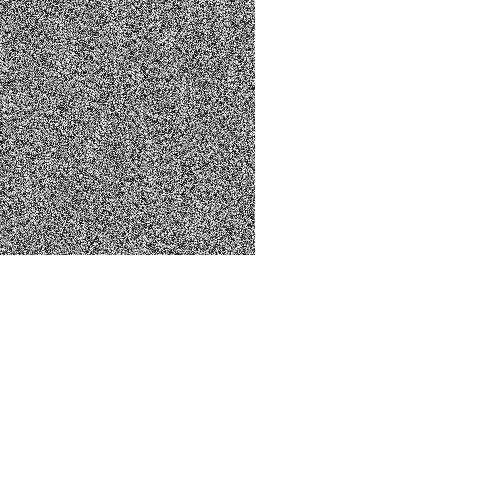

In [6]:
val pImage = BufferedImage(width, height, BufferedImage.TYPE_INT_ARGB)

for (y in 0 until 255) {
    for (x in 0 until 255) {
        // 生成一个 0 到 255 之间的随机灰度值
        val grayValue = P[ P[x] + y ]
        // 设置像素的颜色
        pImage.setRGB(x, y, Color(grayValue, grayValue, grayValue).rgb)
    }
}

pImage

In [7]:
// 获取常数向量
fun GetConstantVector(v: Int): Vector2 {
    // v is the value from the permutation table
    val h = v and 3;
    return when(h) {
        0 -> Vector2(1.0, 1.0)
        1 -> Vector2(-1.0, 1.0);
        2 -> Vector2(-1.0, -1.0)
        else -> Vector2(1.0, -1.0)
    }
}

In [8]:
val xStart = mutableListOf<Int>()
val yStart = mutableListOf<Int>()
val xEnd = mutableListOf<Int>()
val yEnd = mutableListOf<Int>()
val vPoints = mutableListOf<Int>()

for (y in 0 until 20) {
    for (x in 0 until 20) {
        xStart.add(x)
        yStart.add(y)
        vPoints.add(P[P[x] + y] % 4)
//         val vector = GetConstantVector();
//         xEnd.add(x + vector.x.toInt())
//         yEnd.add(y + vector.y.toInt())
    }
}

val gridMap = mapOf(
    "xStart" to xStart,
    "yStart" to yStart,
    "vPoints" to vPoints,
)

plot(gridMap) {
    points  {
        x("xStart")
        y("yStart")
        color("vPoints")
    }
}

<head>
 <meta charset="UTF-8">
 <style> html, body { margin: 0; overflow: hidden; } </style>
 <script type="text/javascript" data-lets-plot-script="library" src="https://cdn.jsdelivr.net/gh/JetBrains/lets-plot@v4.3.3/js-package/distr/lets-plot.min.js"></script>
 </head>
 <body>
 <div id="mSTfRe"></div>
 <script type="text/javascript" data-lets-plot-script="plot">
 var plotSpec={
"mapping":{
},
"data":{
"xStart":[0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0],
"vPoints":[1.0,3.0,3.0,0.0,1.0,1.0,2.0,1.0,2.0,2.0,1.0,1.0,1.0,0.0,1.0,0.0,3.0,0.0,1.0,2.0,2.0,0.0,2.0,0.0,0.0,0.0,0.0,3.0,0.0,1.0,1.0,0.0,0.0,2.0,1.0,0.0,2.0,2.0,1.0,0.0,1.0,0.0,2.0,2.0,0.0,0.0,3.0,1.0,0.0,1.0,3.0,3.0,3.0,2.0,3.0,0.0,1.0,1.0,0.0,3.0,0.0,2.0,3.0,3.0,2.0,3.0,1.0,0.0,3.0,3.0,1.0,2.0,2.0,2.0,0.0,3.0,0.0,2.0,0.0,0.0,2.0,0.0,2.0,2.0,3.0,2.0,2.0,0.0,3.0,1.0,1.0,0.0,2.0,0.0,1.0,1.0,3.0,2.0,3.0,2.0,3.0,2.0,1.0,1.0,2.0,1.0,2.0,3.0,2.0,1.0,0.0,1.0,1.0,1.0,2.0,2.0,2.0,0.0,0.0,3.0,3.0,3.0,0.0,1.0,1.0,2.0,3.0,2.0,1.0,0.0,0.0,0.0,2.0,1.0,1.0,1.0,3.0,3.0,1.0,0.0,2.0,2.0,3.0,3.0,1.0,0.0,2.0,1.0,1.0,0.0,1.0,3.0,2.0,2.0,3.0,3.0,3.0,3.0,2.0,2.0,1.0,1.0,2.0,1.0,3.0,3.0,2.0,2.0,3.0,1.0,1.0,0.0,0.0,2.0,1.0,0.0,3.0,1.0,1.0,1.0,3.0,1.0,3.0,1.0,1.0,1.0,3.0,0.0,1.0,1.0,0.0,0.0,0.0,3.0,0.0,2.0,0.0,3.0,0.0,2.0,0.0,1.0,3.0,0.0,1.0,0.0,2.0,3.0,3.0,0.0,0.0,3.0,3.0,1.0,0.0,2.0,2.0,3.0,0.0,2.0,0.0,3.0,3.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,3.0,2.0,3.0,0.0,3.0,2.0,1.0,0.0,3.0,0.0,2.0,3.0,0.0,1.0,0.0,2.0,0.0,0.0,2.0,3.0,0.0,1.0,2.0,0.0,2.0,0.0,2.0,1.0,2.0,3.0,0.0,3.0,2.0,1.0,1.0,3.0,3.0,1.0,3.0,0.0,1.0,3.0,1.0,3.0,1.0,1.0,1.0,1.0,0.0,3.0,2.0,0.0,1.0,0.0,1.0,2.0,2.0,2.0,3.0,1.0,2.0,2.0,1.0,1.0,2.0,1.0,0.0,1.0,0.0,1.0,3.0,1.0,2.0,0.0,0.0,2.0,3.0,3.0,1.0,2.0,1.0,3.0,3.0,0.0,0.0,2.0,2.0,0.0,3.0,3.0,2.0,1.0,1.0,3.0,0.0,0.0,3.0,2.0,0.0,1.0,0.0,0.0,1.0,3.0,3.0,2.0,3.0,1.0,2.0,3.0,1.0,2.0,0.0,0.0,3.0,3.0,3.0,2.0,2.0,0.0,0.0,3.0,3.0,2.0,1.0,3.0,3.0,1.0,0.0,0.0,1.0,3.0,2.0,1.0,0.0,0.0,0.0,0.0,3.0,0.0,3.0,2.0,1.0,2.0,0.0,1.0,2.0,0.0,0.0,1.0,1.0,1.0,3.0,2.0,1.0,2.0,2.0,3.0,1.0,3.0,2.0,1.0,2.0,3.0,1.0,0.0,1.0,3.0,1.0,1.0],
"yStart":[0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0

### 平滑曲线辅助函数


### 编写 Noise2d_v1 函数

In [9]:
fun Fade(t: Double): Double {
    return 6*t*t*t*t*t - 15*t*t*t*t + 10*t*t*t;
}

fun Lerp(t: Double, a1: Double, a2: Double): Double {
    return a1 + t*(a2-a1);
}

// 差值 Lerp
val x: List<Double> = (0..100).step(1).map { it.toDouble() / 100.0 }
val y: List<Double> = x.map { Fade(it) }
val curveMap = mapOf("x" to x, "y" to y)

plot(curveMap) {
    x("x")
    y("y")
    line {
        color = KColor.GREEN
    }
}

<head>
 <meta charset="UTF-8">
 <style> html, body { margin: 0; overflow: hidden; } </style>
 <script type="text/javascript" data-lets-plot-script="library" src="https://cdn.jsdelivr.net/gh/JetBrains/lets-plot@v4.3.3/js-package/distr/lets-plot.min.js"></script>
 </head>
 <body>
 <div id="QKBxgh"></div>
 <script type="text/javascript" data-lets-plot-script="plot">
 var plotSpec={
"mapping":{
},
"data":{
"x":[0.0,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1,0.11,0.12,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.2,0.21,0.22,0.23,0.24,0.25,0.26,0.27,0.28,0.29,0.3,0.31,0.32,0.33,0.34,0.35,0.36,0.37,0.38,0.39,0.4,0.41,0.42,0.43,0.44,0.45,0.46,0.47,0.48,0.49,0.5,0.51,0.52,0.53,0.54,0.55,0.56,0.57,0.58,0.59,0.6,0.61,0.62,0.63,0.64,0.65,0.66,0.67,0.68,0.69,0.7,0.71,0.72,0.73,0.74,0.75,0.76,0.77,0.78,0.79,0.8,0.81,0.82,0.83,0.84,0.85,0.86,0.87,0.88,0.89,0.9,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99,1.0],
"y":[0.0,9.8506E-6,7.76192E-5,2.5799579999999996E-4,6.022144E-4,0.0011581250000000003,0.0019702655999999995,0.003079934200000001,0.0045252608,0.006341279399999999,0.008560000000000002,0.011210480600000001,0.014318899199999997,0.0179086258,0.022000294400000005,0.026611874999999997,0.0317587456,0.0374537642,0.043707340799999994,0.0505275094,0.05792000000000001,0.0658883106,0.07443377920000001,0.08355565580000003,0.09325117439999998,0.103515625,0.1143424256,0.1257231942,0.13764782080000004,0.15010453940000001,0.16307999999999997,0.1765593406,0.1905262592,0.20496308580000006,0.21985085440000002,0.23516937499999996,0.25089730559999995,0.26701222420000004,0.2834907008,0.30030836940000005,0.31744000000000006,0.33485957060000004,0.35254033920000005,0.3704549158,0.3885753344,0.40687312500000006,0.42531938560000015,0.4438848541999999,0.4625399807999999,0.48125499940000016,0.5,0.5187450005999998,0.5374600191999999,0.5561151458000002,0.5746806143999998,0.593126875,0.6114246656000002,0.6295450841999999,0.6474596608000001,0.6651404293999996,0.6825599999999998,0.6996916305999998,0.7165092991999997,0.7329877757999999,0.7491026943999999,0.7648306249999997,0.7801491456000003,0.7950369142000002,0.8094737407999997,0.8234406594000001,0.8369199999999997,0.8498954606,0.8623521791999997,0.8742768058000006,0.8856575743999997,0.896484375,0.9067488256000003,0.9164443442000003,0.9255662208,0.9341116893999999,0.9420799999999998,0.9494724905999998,0.9562926592000007,0.9625462357999988,0.9682412544000014,0.9733881249999978,0.9779997056000003,0.9820913741999995,0.9856811007999999,0.9887895194000018,0.9914400000000008,0.9936587206,0.9954747392000014,0.9969200657999977,0.9980297344000002,0.9988418749999992,0.9993977856000003,0.9997420042000016,0.9999223808000028,0.9999901493999985,1.0]
},
"kind":"plot",
"scales":[{
"aesthetic":"x",
"limits":[null,null]
},{
"aesthetic":"y",
"limits":[null,null]
}],
"layers":[{
"mapping":{
"x":"x",
"y":"y"
},
"stat":"identity",
"color":"#3ba272",
"sampling":"none",
"position":"identity",
"geom":"line",
"data":{
}
}]
};
 var plotContainer = document.getElementById("QKBxgh");
 LetsPlot.buildPlotFromProcessedSpecs(plotSpec, -1, -1, plotContainer);
 </script>
 </body>
</html>"> 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 <path d="M24.4075135808963 325.5 L24.4075135808963 325.5 L29.28901629707556 325.496946314 L34.17051901325482 325.475938048 L39.052021729434074 325.420021302 L43.933524445613344 325.313313536 L48.8150271617926 325.14098125 L53.696529877971855 324.889217664 L58.57803259415112 324.545220398 L63.45953531033038 324.097169152 L68.34103802650964 323.534203386 L73.22254074268889 322.8464 L78.10404345886815 322.024751014 L82.9855461750474 321.061141248 L87.86704889122669 319.948326002 L92.74855160740594 318.679908736 L97.6300543235852 317.25031875 L102.51155703976445 315.654788864 L107.39305975594371 313.889333098 L112.27456247212297 311.950724352 L117.15606518830222 309.836472086 L122.0375679044815 307.5448 L126.91907062066076 305.074623714 L131.80057333684002 302.425528448 L136.6820760530

In [10]:
fun Noise2d_v1(x: Double, y: Double): Double {
    val X = floor(x).toInt() and 255 // 等价于取余 256
    val Y =  floor(y).toInt() and 255 // 等价于取余 256

    // decimal place
    val X_f = x - floor(x)
    val Y_f = y - floor(y)
    
    val topRight = Vector2(X_f - 1.0, Y_f - 1.0);
    val topLeft =  Vector2(X_f, Y_f - 1.0);
    val bottomRight = Vector2(X_f - 1.0, Y_f);
    val bottomLeft = Vector2(X_f, Y_f);

    val valueTopRight = P[P[X + 1] + Y + 1];
    val valueTopLeft = P[P[X] + Y + 1];
    val valueBottomRight = P[P[X + 1] + Y];
    val valueBottomLeft = P[P[X] + Y];
    
    val dotTopRight = topRight * GetConstantVector(valueTopRight)
    val dotTopLeft = topLeft * GetConstantVector(valueTopLeft)
    val dotBottomRight = bottomRight * GetConstantVector(valueBottomRight)
    val dotBottomLeft = bottomLeft * GetConstantVector(valueBottomLeft)

    val u = Fade(X_f);
    val v = Fade(Y_f);
    return Lerp(
        u,
        Lerp(v, dotBottomLeft, dotTopLeft),
        Lerp(v, dotBottomRight, dotTopRight)
    );
}

Noise2d_v1(100.5, 100.5)

-0.25

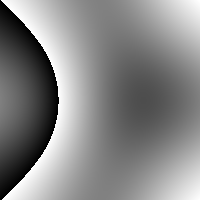

In [11]:
import java.awt.Color

val height= 200
val width = 200
val image_v1 = BufferedImage(width, height, BufferedImage.TYPE_INT_ARGB)
for (y in 0 until height) {
    for (x in 0 until width) {
        // 生成一个 0 到 255 之间的随机灰度值
        val value = Noise2d_v1(x * 0.005, y * 0.005)
        
        val grayValue = (value * 255).toInt() and 255
        // 设置像素的颜色
        image_v1.setRGB(x, y, Color(grayValue, grayValue, grayValue).rgb)
    }
}

image_v1

In [12]:
fun FractalBrownianMotion(x: Int, y: Int, numOctaves: Int): Double {
    var result: Double = 0.0;
    var amplitude: Double = 1.0;
    var frequency: Double = 0.005;
    for(octave in 0..numOctaves) {
        val n = amplitude * Noise2d_v1(x * frequency, y * frequency);
        result += n;

        amplitude *= 0.5;
        frequency *= 2.0;
    }

    return result;
}

(FractalBrownianMotion(100, 100, 8) + 1.0) * 0.5

0.25

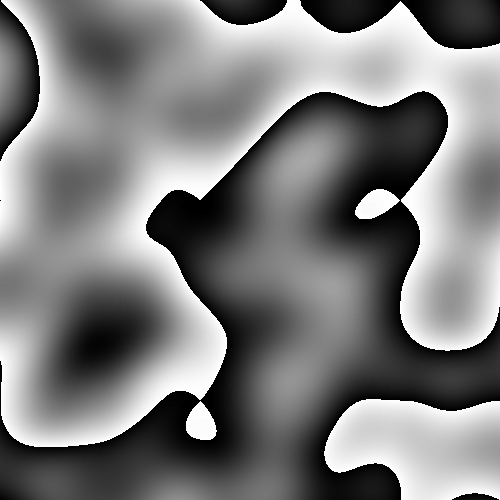

In [13]:
val height= 500
val width = 500
val image_v2 = BufferedImage(width, height, BufferedImage.TYPE_INT_ARGB)
for (y in 0 until height) {
    for (x in 0 until width) {
        var n = 0.0;
        var  a = 1.0;
        // 这里限制只取 0~2.5格
        var  f = 0.005;
        for(o in 0..1) {
           var v = a * Noise2d_v1(x * f, y * f);
            n += v;
    
            a *= 0.5;
            f *= 2.0; 
        }

        n += 1.0;
        n *= 0.5;

        var value = Math.round(255 * n);
        val grayValue = value.toInt() * 2 and 255 
        // 设置像素的颜色
        image_v2.setRGB(x, y, Color(grayValue, grayValue, grayValue).rgb)
    }
}

image_v2

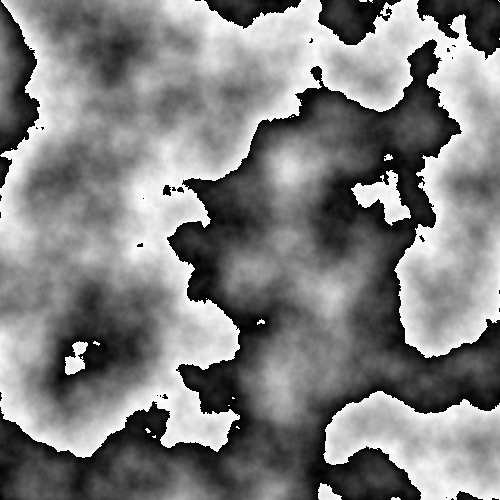

In [14]:
val height= 500
val width = 500
val image_v3 = BufferedImage(width, height, BufferedImage.TYPE_INT_ARGB)
for (y in 0 until height) {
    for (x in 0 until width) {
        var n = 0.0;
        var  a = 1.0;
        // 这里限制只取 0~2.5格
        var  f = 0.005;
        for(o in 0..8) {
           var v = a * Noise2d_v1(x * f, y * f);
            n += v;
    
            a *= 0.5;
            f *= 2.0; 
        }

        n += 1.0;
        n *= 0.5;

        var value = Math.round(255 * n);
        val grayValue = value.toInt() * 2 and 255 
        // 设置像素的颜色
        image_v3.setRGB(x, y, Color(grayValue, grayValue, grayValue).rgb)
    }
}

image_v3

从上面第一个没有分形迭代的图，可以猜测：生成结果与顶点的坐标有关系

如果我们在生成的图片画上网格，得到下面的图片。

In [15]:
%js

import './samples/sample.js'

观察网格内部的深色区域，都是向量指向的方向。

显然是一个格子的四个顶点的向量方向影响生产结果。对于一个格子，共有16种情况。

In [ ]:
%js

import "./samples/cell-grid-16-number.js"

将数值转换为颜色，可以更直接看到顶点向量和内部颜色分布的关系

In [ ]:
%js

import "./samples/cell-grid-16-color.js"